In [89]:
# importer pakkene
import numpy as np # matte
from matplotlib import pyplot as plt #plot
import sympy as sp # matte

## Oppgave

*Beregn gjennomsnitts- og grenseproduktiviteten til arbeidskraft for produktfunksjon (1), og tegn disse i en figur. Forklar figuren. For hvilken verdi av $N$ er grenseproduktiviteten høyest?  (Hint: husk hvordan vi tegnet sympy uttrykk i matplotlib ved å bruke `sp.lambdify()` i forelesning 5).*

En produksjons funksjon gis som:

$ x = f(N, K).$

Der $N = arbeidskraft$ og $K = kapital$

Grenseproduksjon kan finnes ved:

$\frac{\partial x}{\partial N}=f'_N > 0.$

Dette måler hvor mye ekstra som produseres dersom forbruk av den tilsvarende variabelen økes.

gjennomsnitsproduktivitet kan finnes ved:

$\frac{x}{N}=\frac{f(N,K_0)}{N}.$

Dette måles som helningen til en stråle fra origo til et bestemt punkt på produktfunksjonen. Dette er liknende et stigningstall.

### Definerer og lager produktfunksjon.

In [90]:
# definer symboler
# N : enheter arbeidskraft (målt i timer)
# A : en konstant > 0
N, A = sp.symbols('N A', positive=True, real=True) #sørger for at symbolene bare er positive og reale tall

*produktfunkjson*

\begin{equation}
   x=f(N,K)=K\frac{e^N}{A+e^N}\tag{1}
\end{equation}

Ifølge seminar.9 så var $K = 1000$ og $A = 200$, så jeg skal bruke de samme tallene. Disse tallene er for produksjon i kort sikt.

In [91]:
# Definerer produktfunksjon
def prod(c,N,A):
    produksjon=1000*(c.exp(N)/(A+c.exp(N)))
    return produksjon
prod(sp,N,A) #sp for sympy np for numpy. sympy brukes for kalkulering og numpy for tegning.

1000*exp(N)/(A + exp(N))

**Lager plot for figur og tegner produksjonsfunksjonen**

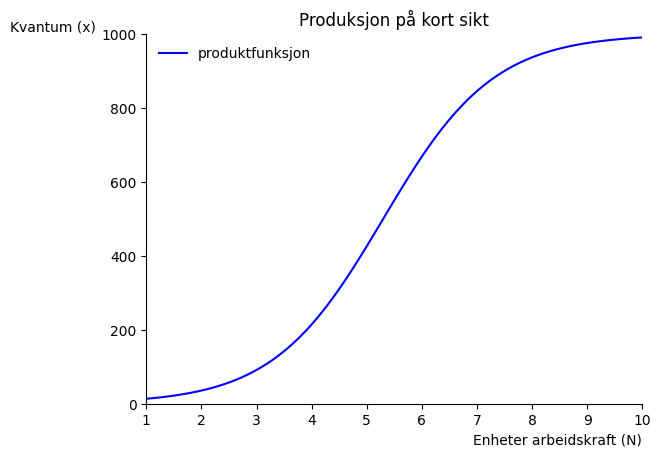

In [92]:
n=np.linspace(1,10,100) #N = verdier

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Kvantum (x)', loc='top', rotation = 0) #navn for y-akse
                ax.set_xlabel('Enheter arbeidskraft (N)', loc='right') #navn for x-akse
                ax.set(xlim=(1,10)) #grense x-akse
                ax.set(ylim=(0,1000)) #grense y-akse
                ax.spines['top'].set_color('none') #skjuler linjen på toppen
                ax.spines['right'].set_color('none') #skjuler linjen til høyre
                
                return fig, ax

fig1, ax1 = create_ax()
#tegner funksjonen
ax1.plot(n, prod(np,n,200), label='produktfunksjon', color = 'blue') #plotter prod(c,N,A), som numpy og der A = 200
# tittel
ax1.set_title('Produksjon på kort sikt')
#vis navnene:
ax1.legend(loc='best',frameon=False);

### Beregner grenseproduktivitet

finner den delvise deriverte av funksjon x med respekt til N:

$\frac{\partial x}{\partial N}=f'_N > 0.$

In [93]:
#Finner den deriverte med respekt til N
dx_dN = sp.simplify(sp.diff(prod(sp,N,200), N))
dx_dN_func = sp.lambdify(N, dx_dN)

dx_dN_func
dx_dN

200000*exp(N)/(exp(2*N) + 400*exp(N) + 40000)

In [94]:
#finner for alle verdier n inne i funksjonen
dx_dN_val = dx_dN_func(n)

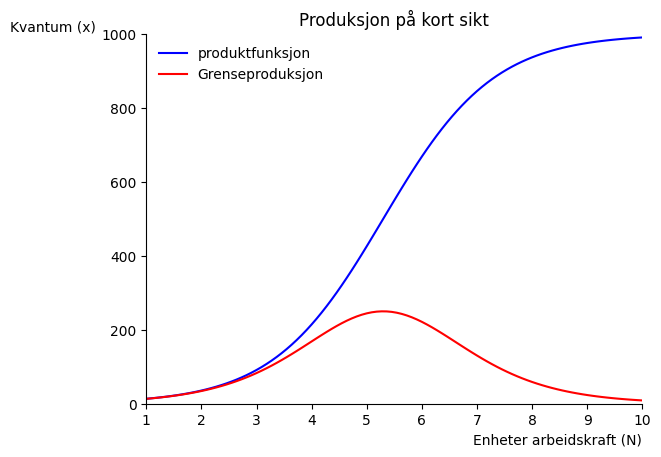

In [95]:
#plotter grenseproduksjon
ax1.plot(n, dx_dN_val, label = 'Grenseproduksjon', color = 'red')
ax1.legend(loc='best',frameon=False);
fig1 #viser figur

### Beregner gjennomsnitsproduktivitet.

finner gjennomsnitsproduktivitet:

$\frac{x}{N}=\frac{f(N,K_0)}{N}.$

In [96]:
avg_prod = (prod(sp,N,200)) / (N)
avg_prod_func = sp.lambdify(N, avg_prod)

avg_prod_func
avg_prod

1000*exp(N)/(N*(exp(N) + 200))

In [97]:
#finner for alle verdier n
avg_prod_val = avg_prod_func(n)

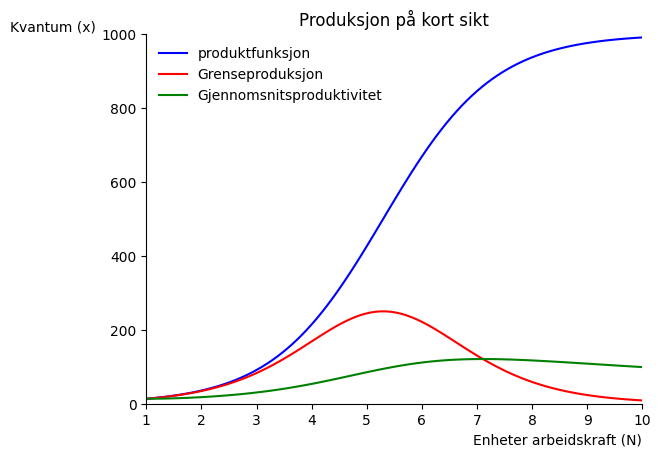

In [98]:
#plotter grenseproduksjon
ax1.plot(n, avg_prod_val, label = 'Gjennomsnitsproduktivitet', color = 'green')
ax1.legend(loc='best',frameon=False);
fig1 #viser figur

In [103]:
max_x = np.argmax(dx_dN_val) #finner høyeste verdi av variabelen dx_dN_val
print("Topppunktet til grenseproduksjon er : ", max_x)

max_N = n[max_x] #finner index plasering av max_x i alle n verdier
print("Grenseproduksjon er høyest når N = ", round(max_N, 2))

Topppunktet til grenseproduksjon er :  47
Grenseproduksjon er høyest når N =  5.27


### Hva viser figuren?

Figuren inneholder 3 funksjoner.

Den blåe produktsjonsfiguren er en funksjon som illustrerer sammenhengen mellom kapital = K, arbeidskraft = N og hvordan det påvirker kvantum av produksjon. Siden denne figuren har K som en konstant med verdi 1000, så viser denne figuren bare sammenhengen mellom enheter arbeidskraft(N) og kvantum.

Den røde linjen illustrerer hvor mye ekstra som produserer dersom den tilsvarende variabelen økes. I dette tilfellet så viser den mengde ekstra som blir produsert hvis arbeidskraft(N) øker.

Den grønne linjen illustrerer hvor mye som produserer per enhet med arbeidskraft. som f.eks 1 enhet arbeidskraft produserer 40 enheter med produkt etc.

Når N = 5.27 så er grenseproduksjon på sitt høyeste.